# STR model

In [3]:
!pip install fredapi

## Import libs

In [4]:
# basic libs
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from functools import reduce

# stats libs
import statsmodels.api as sm
import statsmodels.regression.linear_model as lm
from statsmodels.tsa.stattools import adfuller

from scipy.optimize import minimize

# import yahoo finance to collect stocks data
import yfinance as yf
from fredapi import Fred

## Import Data

In [5]:


# Get data from FRED :
def get_FRED_series(ticker):
    FRED_API_KEY = "9a54ab68d82273ea59014b16364b5bdd"
    fred = Fred(api_key=FRED_API_KEY)
    data = fred.get_series(ticker)
    data = data.dropna()
    data = pd.DataFrame(data)
    data.index = pd.to_datetime(data.index)
    return data

def get_YF_series(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

### Import GDP

In [6]:
gdp = get_FRED_series("GDP")["2000":"2022"]
gdp = gdp.resample('Y').mean()
gdp.index = gdp.index + timedelta(days=1)
gdp.rename(columns={0: 'gdp'},inplace=True)
gdp

,gdp
2001-01-01,10250.95200
2002-01-01,10581.92900
2003-01-01,10929.10825
2004-01-01,11456.44950
2005-01-01,12217.19575
2006-01-01,13039.19700
2007-01-01,13815.58300
2008-01-01,14474.22700
2009-01-01,14769.86175
2010-01-01,14478.06725


### Import industrial production

In [7]:
industrial_production = get_FRED_series("IPG211111CS")["2000":"2022"]
industrial_production = industrial_production.resample('Y').mean()
industrial_production.index = industrial_production.index + timedelta(days=1)
industrial_production.rename(columns={0: 'industrial_production'},inplace=True)
industrial_production

,industrial_production
2001-01-01,89.471058
2002-01-01,89.158442
2003-01-01,88.286983
2004-01-01,86.836367
2005-01-01,83.618667
2006-01-01,79.569117
2007-01-01,78.155033
2008-01-01,77.979358
2009-01-01,76.822333
2010-01-01,82.246508


### Import Saudi oil production

In [8]:
oil_production_saudi = get_FRED_series("SAUNGDPMOMBD")["2000":"2022"]
oil_production_saudi.rename(columns={0: 'oil_production_saudi'},inplace=True)
oil_production_saudi

,oil_production_saudi
2000-01-01,8.090000e+06
2001-01-01,7.890000e+06
2002-01-01,7.090000e+06
2003-01-01,8.410000e+06
2004-01-01,8.900000e+06
2005-01-01,9.350000e+06
2006-01-01,9.210000e+06
2007-01-01,8.820000e+06
2008-01-01,9.200000e+06
2009-01-01,8.180000e+06


### Import Emirates oil production

In [9]:
oil_production_emirates = get_FRED_series("ARENGDPMOMBD")["2000":"2022"]
oil_production_emirates.rename(columns={0: 'oil_production_emirates'},inplace=True)
oil_production_emirates

,oil_production_emirates
2000-01-01,2.190000e+06
2001-01-01,2.120000e+06
2002-01-01,1.930000e+06
2003-01-01,2.260000e+06
2004-01-01,2.330000e+06
2005-01-01,2.380000e+06
2006-01-01,2.600000e+06
2007-01-01,2.530000e+06
2008-01-01,2.618000e+06
2009-01-01,2.242000e+06


### Import oil stock price

In [10]:
oil_sock_price = get_YF_series("CL=F", "2000-01-01", "2022-01-01")
oil_sock_price = oil_sock_price.resample('Y').mean()
oil_sock_price = pd.DataFrame(oil_sock_price)
oil_sock_price.index = oil_sock_price.index + timedelta(days=1)
oil_sock_price.rename(columns={'Adj Close': 'oil_stock_price'},inplace=True)
oil_sock_price

[*********************100%%**********************]  1 of 1 completed


,oil_stock_price
Date,
2001-01-01,32.393708
2002-01-01,25.960405
2003-01-01,26.150440
2004-01-01,30.994400
2005-01-01,41.469076
2006-01-01,56.704502
2007-01-01,66.254560
2008-01-01,72.364524
2009-01-01,99.751541


### Merge the time series into a DataFrame

In [11]:
from functools import reduce
dfs = [gdp, industrial_production, oil_production_saudi, oil_production_emirates, oil_sock_price]

df = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), dfs)
df

,gdp,industrial_production,oil_production_saudi,oil_production_emirates,oil_stock_price
2001-01-01,10250.95200,89.471058,7.890000e+06,2.120000e+06,32.393708
2002-01-01,10581.92900,89.158442,7.090000e+06,1.930000e+06,25.960405
2003-01-01,10929.10825,88.286983,8.410000e+06,2.260000e+06,26.150440
2004-01-01,11456.44950,86.836367,8.900000e+06,2.330000e+06,30.994400
2005-01-01,12217.19575,83.618667,9.350000e+06,2.380000e+06,41.469076
2006-01-01,13039.19700,79.569117,9.210000e+06,2.600000e+06,56.704502
2007-01-01,13815.58300,78.155033,8.820000e+06,2.530000e+06,66.254560
2008-01-01,14474.22700,77.979358,9.200000e+06,2.618000e+06,72.364524
2009-01-01,14769.86175,76.822333,8.180000e+06,2.242000e+06,99.751541
2010-01-01,14478.06725,82.246508,8.170000e+06,2.324000e+06,62.094088


### Plot each time series

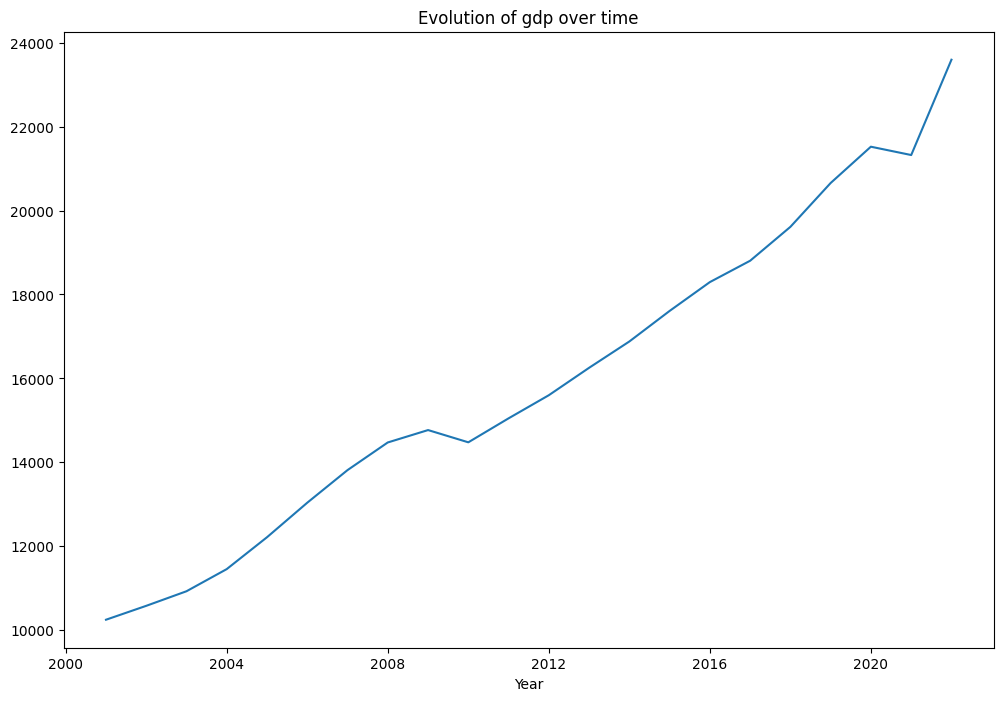

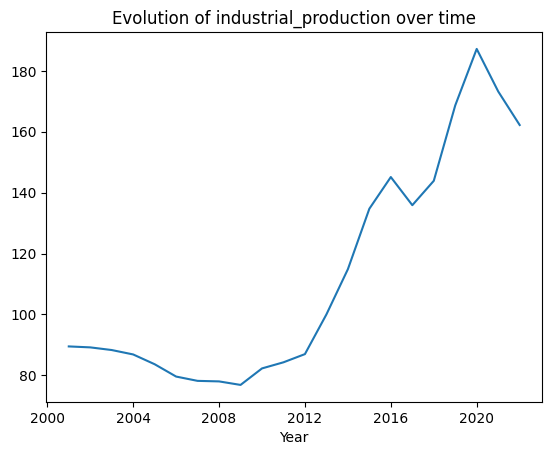

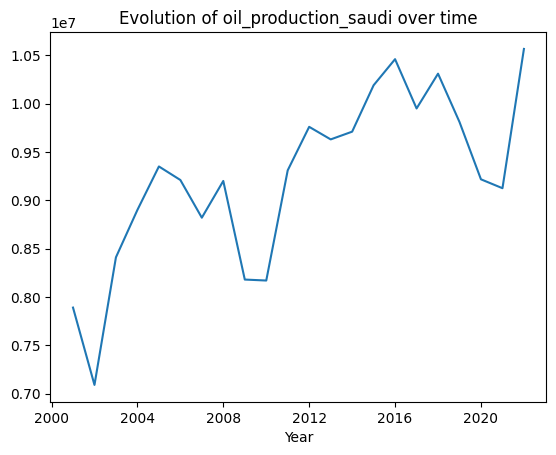

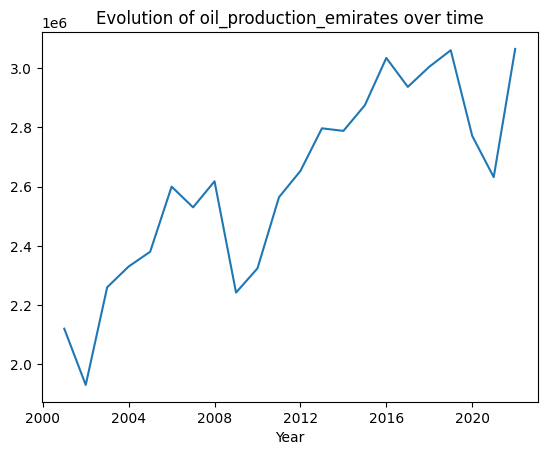

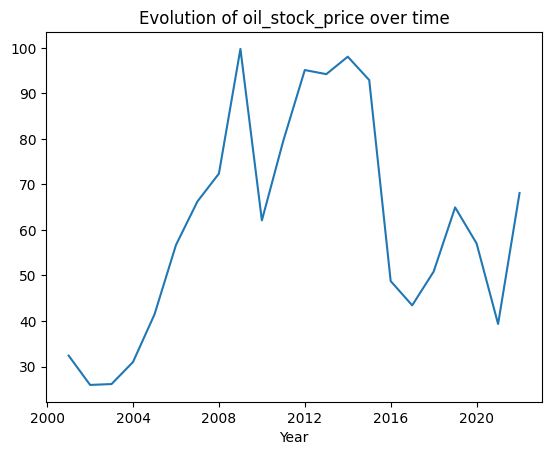

In [12]:
# Plot each column to a separate line plot graph
plt.figure(figsize=(12, 8))

for column in df.columns:
    plt.plot(df.index, df[column], label=column)
    plt.xlabel('Year')
    plt.title("Evolution of "+ column + " over time")
    plt.show()

### Take the first difference to make the `oil_stock_price` time series stationary

In [13]:
# Compute the return of each column
returns_df = df.pct_change().dropna()
# Print the returns DataFrame
returns_df

,gdp,industrial_production,oil_production_saudi,oil_production_emirates,oil_stock_price
2002-01-01,0.032287,-0.003494,-0.101394,-0.089623,-0.198597
2003-01-01,0.032809,-0.009774,0.186178,0.170984,0.007320
2004-01-01,0.048251,-0.016431,0.058264,0.030973,0.185234
2005-01-01,0.066403,-0.037055,0.050562,0.021459,0.337954
2006-01-01,0.067282,-0.048429,-0.014973,0.092437,0.367392
2007-01-01,0.059542,-0.017772,-0.042345,-0.026923,0.168418
2008-01-01,0.047674,-0.002248,0.043084,0.034783,0.092220
2009-01-01,0.020425,-0.014838,-0.110870,-0.143621,0.378459
2010-01-01,-0.019756,0.070607,-0.001222,0.036574,-0.377513
2011-01-01,0.039432,0.024400,0.139535,0.103270,0.282085


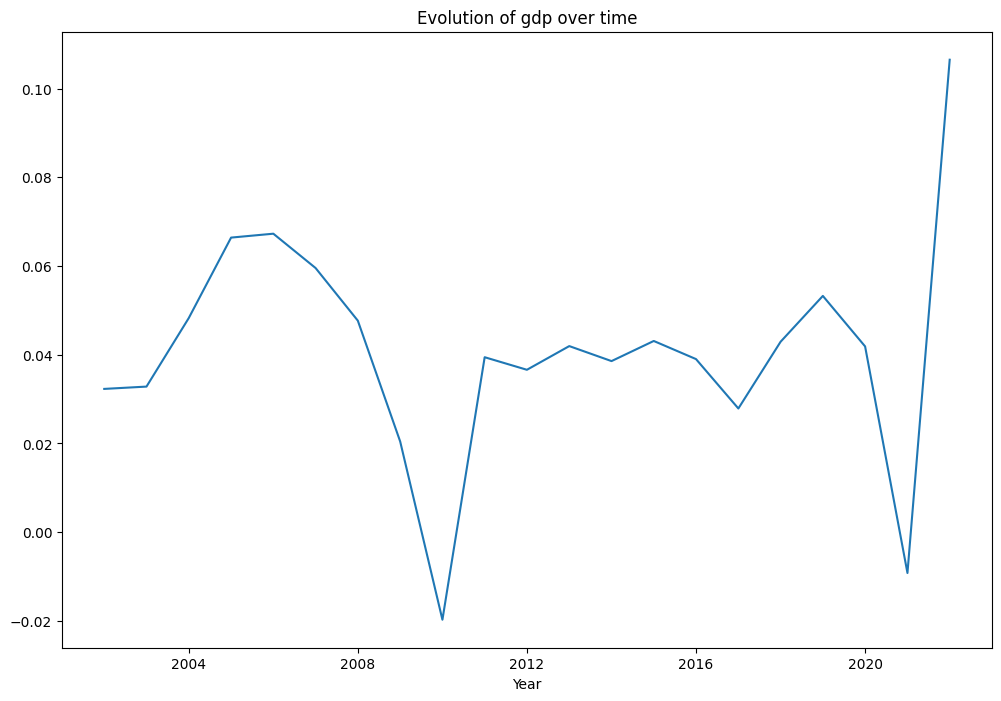

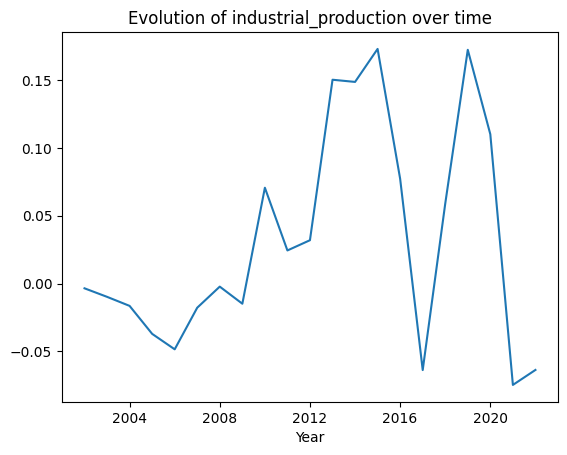

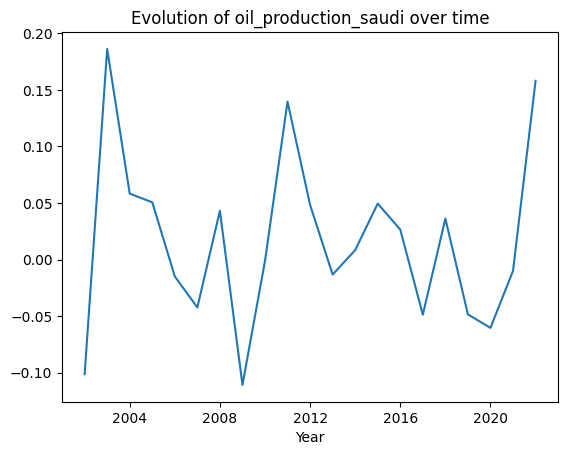

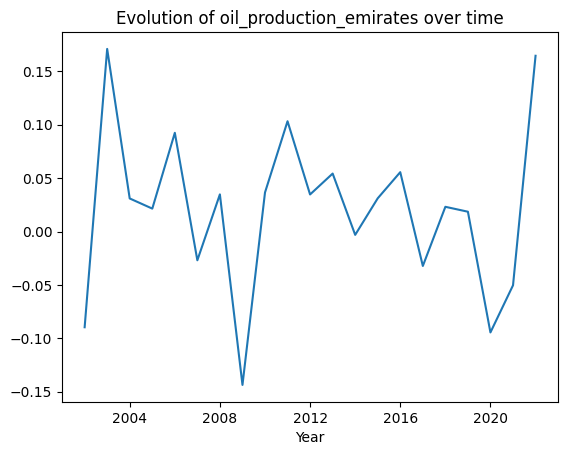

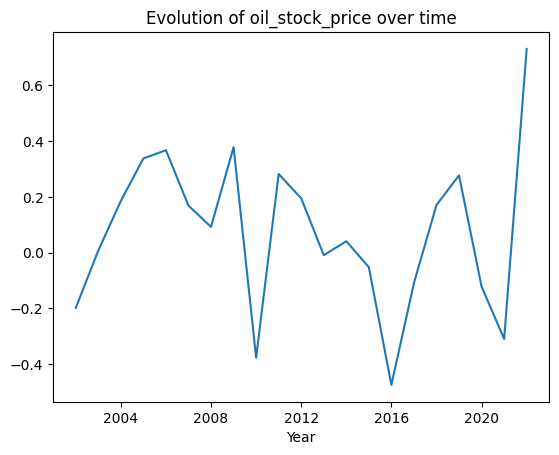

In [14]:
# Plot each column to a separate line plot graph
plt.figure(figsize=(12, 8))

for column in returns_df.columns:
    plt.plot(returns_df.index, returns_df[column], label=column)
    plt.xlabel('Year')
    plt.title("Evolution of "+ column + " over time")
    plt.show()

In [15]:
# Check for stationarity using ADF test
for column in returns_df.columns:
    result = adfuller(returns_df[column])
    print(f'ADF Test for {column}:')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    print('Is Stationary:', result[1] < 0.05)
    print("----------------------------------")
    print('\n')


ADF Test for gdp:
ADF Statistic: -3.6963143184875746
p-value: 0.004165296239819103
Critical Values: {'1%': -3.8092091249999998, '5%': -3.0216450000000004, '10%': -2.6507125}
Is Stationary: True
----------------------------------


ADF Test for industrial_production:
ADF Statistic: -2.9795257954645393
p-value: 0.03685117790995701
Critical Values: {'1%': -3.8326031418574136, '5%': -3.0312271701414204, '10%': -2.655519584487535}
Is Stationary: True
----------------------------------


ADF Test for oil_production_saudi:
ADF Statistic: -4.178094178631955
p-value: 0.0007174737056428218
Critical Values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
Is Stationary: True
----------------------------------


ADF Test for oil_production_emirates:
ADF Statistic: -3.777356210880335
p-value: 0.0031476754347957454
Critical Values: {'1%': -3.8326031418574136, '5%': -3.0312271701414204, '10%': -2.655519584487535}
Is Stationary: True
----------------------------------


### Apply simple linear regression

${{\%Changeg(oil\_stock\_price)}} = \beta_0 + \beta_1 \times {\%Change(gdp)} + \beta_2 \times {\%Changeg(industrial\_production)} + \beta_3 \times {\%Changeg(oil\_production\_saudi)} + \beta_4 \times {\%Changeg(oil\_production\_emirates)} + \varepsilon$

In [16]:
# Specify the dependent variable (y) and independent variables (X)
y = returns_df['oil_stock_price']
X = returns_df[['gdp', 'industrial_production', 'oil_production_saudi', 'oil_production_emirates']]
X= sm.add_constant(X)
# Fit the OLS model
model = sm.OLS(y, X).fit()

                            OLS Regression Results                            
Dep. Variable:        oil_stock_price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     5.707
Date:                Mon, 11 Dec 2023   Prob (F-statistic):            0.00474
Time:                        13:34:57   Log-Likelihood:                 6.2974
No. Observations:                  21   AIC:                            -2.595
Df Residuals:                      16   BIC:                             2.628
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Apply STR model

In [17]:
def logistic_transition(x, gamma, c):
    return 1 / (1 + np.exp(-gamma * (x - c)))


In [19]:
def logistic_transition(x, gamma, c):
    return 1 / (1 + np.exp(-gamma * (x - c)))

def STR_model(params, y, x, z):
    # Unpack parameters
    alpha, beta = params[:len(x.columns)], params[len(x.columns):-2]
    gamma, c = params[-2], params[-1]

    # Initialize y_hat
    y_hat = np.zeros(len(x))

    # Calculate y_hat for each observation
    for i in range(len(x)):
        G = logistic_transition(z.iloc[i], gamma, c)
        y_hat[i] = np.sum(alpha + np.dot(beta, x.iloc[i]) + G * (np.dot(beta, x.iloc[i])))

    return y_hat


def objective_function(params, y, x, z):
    y_hat = STR_model(params, y, x, z)
    return np.sum((y - y_hat) ** 2)

initial_params = np.ones(len(X.columns) * 2 + 2)
y=returns_df['oil_stock_price']
z=returns_df['industrial_production']
X =returns_df.drop(['oil_stock_price', 'industrial_production'],axis=1)
bounds = [(None, None)] * (len(X.columns) * 2) + [(-5, 5), (-2, 2)]  # Example bounds for gamma and c
result = minimize(objective_function, initial_params, args=(y, X, z), method='L-BFGS-B', bounds=bounds)
from scipy.optimize import minimize
import os
n_threads = os.cpu_count()

In [20]:
# Define your initial_params (make sure they are properly initialized)
initial_params = np.ones(len(X.columns) * 2 + 2)

# Define your data and bounds as you did in your code

# Determine the maximum number of threads available on your system
n_threads = os.cpu_count()

# Use the maximum number of threads for multithreading
result = minimize(objective_function, initial_params, args=(y, X, z), method='TNC', bounds=bounds, options={'maxfun': 40000, 'maxiter': 4000, 'nfeval': 1000, 'disp': True, 'ftol': 1e-6, 'xtol': 1e-6, 'n_jobs': n_threads})

# Extract the best solution and other details
best_params = result.x
best_objective_value = result.fun
converged = result.success
message = result.message
iterations = result.nit

print("Best Parameters:", best_params)
print("Best Objective Value:", best_objective_value)
print("Converged:", converged)
print("Message:", message)
print("Iterations:", iterations)


<ipython-input-20-0bdfd102a50e>:10: OptimizeWarning: Unknown solver options: maxiter, nfeval, n_jobs
  result = minimize(objective_function, initial_params, args=(y, X, z), method='TNC', bounds=bounds, options={'maxfun': 40000, 'maxiter': 4000, 'nfeval': 1000, 'disp': True, 'ftol': 1e-6, 'xtol': 1e-6, 'n_jobs': n_threads})


Best Parameters: [-0.0948115  -0.0948115  -0.07660225  1.83313804  0.21485064 -0.20531521
 -0.0766853   1.81643466]
Best Objective Value: 0.7185521432245086
Converged: True
Message: Converged (|f_n-f_(n-1)| ~= 0)
Iterations: 50


In [21]:
best_params = result.x
best_objective_value = result.fun
converged = result.success
message = result.message
iterations = result.nit

# Create separate DataFrames for each variable
parameter_names = X.columns.tolist() + ['Gamma', 'C']
parameter_values = best_params.tolist() + [result.x[-2], result.x[-1]]
converged_values = [converged] * len(parameter_names)
objective_values = [best_objective_value] * len(parameter_names)
message_values = [message] * len(parameter_names)
iterations_values = [iterations] * len(parameter_names)


converged_df = pd.DataFrame({
    'Converged': converged_values
})

objective_df = pd.DataFrame({
    'Best Objective Value': objective_values
})

message_df = pd.DataFrame({
    'Message': message_values
})

iterations_df = pd.DataFrame({
    'Iterations': iterations_values
})

In [22]:
parameter_values

[-0.09481150336964128,
 -0.09481150336964128,
 -0.07660225112495866,
 1.833138037564545,
 0.21485064447449975,
 -0.20531520692269334,
 -0.07668529623709561,
 1.8164346628838888,
 -0.07668529623709561,
 1.8164346628838888]

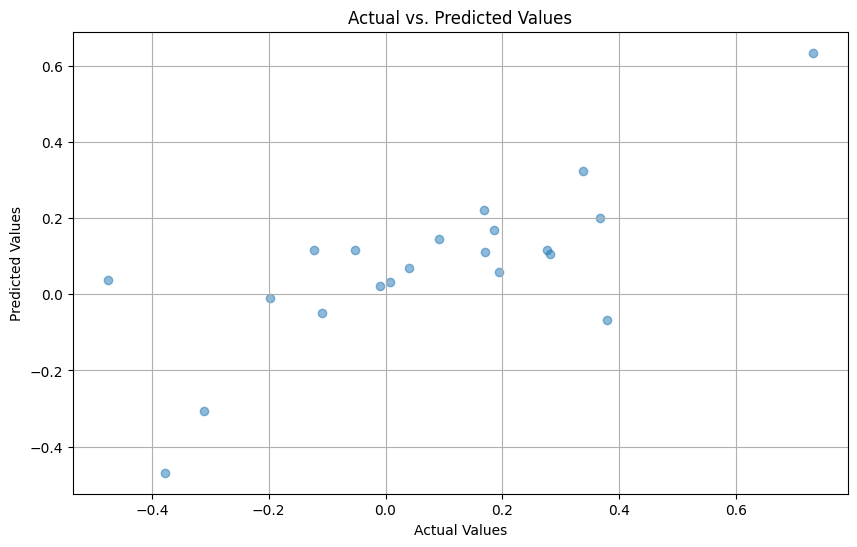

In [23]:
# Extract the best solution and other details
best_params = result.x
best_objective_value = result.fun
converged = result.success
message = result.message
iterations = result.nit

# Calculate predicted values using the best parameters
y_predicted = STR_model(best_params, y, X, z)

# Create a DataFrame to store the actual and predicted values
results_df = pd.DataFrame({'Actual': y, 'Predicted': y_predicted})

# Save the results to a CSV file
results_df.to_csv('results.csv', index=False)

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_predicted, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.savefig('scatter_plot.png')  # Save the plot as an image
plt.show()


### Compute MSE

In [24]:
# Assuming you have 'actual_values' and 'predicted_values' lists
actual_values = np.array(y)
predicted_values = np.array(y_predicted)

# Calculate the mean squared error (MSE)
mse = np.mean((actual_values - predicted_values) ** 2)

print(f"Mean Squared Error (MSE): {mse:.10f}")

Mean Squared Error (MSE): 0.0342167687


### Plot the distribution of the parameters

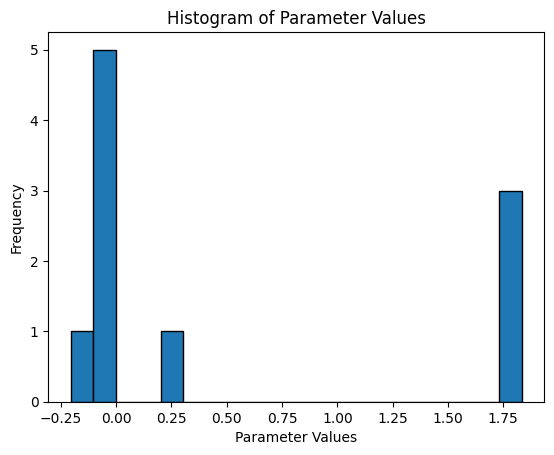

In [25]:
import matplotlib.pyplot as plt

# Assuming parameter_values contains your parameter values
plt.hist(parameter_values, bins=20, edgecolor='k')
plt.xlabel('Parameter Values')
plt.ylabel('Frequency')
plt.title('Histogram of Parameter Values')
plt.show()


### Plot Ground truth vs. Prediction

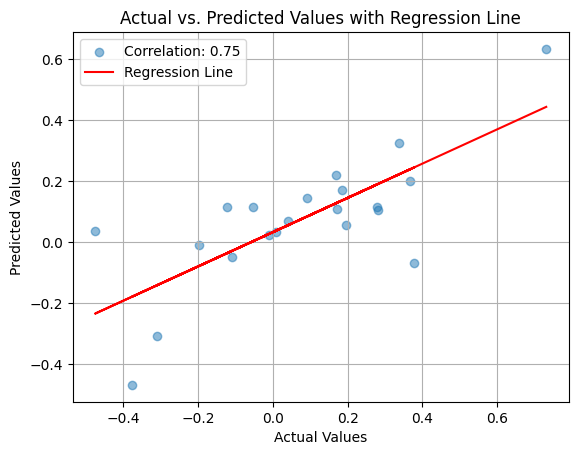

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Assuming you have 'actual_values' and 'predicted_values' lists


# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(y, y_predicted)[0, 1]

# Perform linear regression
slope, intercept, _, _, _ = linregress(y, y_predicted)
regression_line = slope * np.array(y) + intercept

plt.scatter(y, y_predicted, alpha=0.5, label=f'Correlation: {correlation_coefficient:.2f}')
plt.plot(y, regression_line, color='red', label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values with Regression Line')
plt.legend()
plt.grid(True)
plt.show()